## Quantum Computing Exercises and Simulations

**Author: Chrysovalantis Dimitriadis**<br>
**Tools: Qiskit, QCS 2.0**<br>

---

### Overview

This notebook contains personal implementations and experiments completed during a Quantum Computing course.  
The work focuses on fundamental concepts of quantum computation using the circuit model, including quantum gates, quantum registers, measurement, and fundamental quantum algorithms.

The exercises presented in this notebook are presented on the textbook:

- I. G. Karafyllidis. Quantum Computing. Kallipos, Open Academic Editions, 2015 [Undergraduate textbook, CC BY-NC-ND 4.0]

All experiments in this notebook were implemented using both Qiskit (Python) and QCS 2.0(MATLAB), enabling cross-verification of results and deeper understanding of quantum circuit behavior.

The Quantum Computer Simulator (QCS 2.0) is described in:

- I. G. Karafyllidis,  
  "Quantum Computer Simulator based on the Circuit Model of Quantum Computation",  
  IEEE Transactions on Circuits and Systems I, vol. 52, pp. 1590–1596, 2005.

It provides a graphical interface for defining quantum circuits and visualizing:

- Quantum states  
- Measurement probabilities  
- Phase evolution  
- Entanglement during computation  

---

### Goals of This Notebook

- Develop intuition for quantum states and quantum gates  
- Explore quantum circuits through simulation  
- Study measurement probabilities and phase evolution  
- Implement basic quantum algorithms (e.g., Deutsch’s algorithm, Quantum Fourier Transform)  
- Analyze entanglement generation during computation  

All analysis and interpretations presented here were performed by the author and reflect personal learning and experimentation.

#### Exercise 6.1

Verify the generation of the Bell states:
$$
|B_{01}\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}
$$
$$
|B_{10}\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}
$$
##### $|B_{01}\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$
To generate $|B_{01}\rangle$, we start from the state $|01\rangle$, which can be written as a tensor product:
$$
|01\rangle = |0\rangle \otimes |1\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\1\\0\\0 \end{pmatrix}
$$

We first apply a Hadamard gate to the top qubit $|0\rangle$:
$$
(H \otimes I) |01\rangle =
\frac{1}{\sqrt{2}}
\left [
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\otimes
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\right ]
\begin{pmatrix}
0 \\
1 \\
0 \\
0
\end{pmatrix} =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 \\
1 \\
0 \\
1
\end{pmatrix}
$$

Next, we apply a CNOT gate with the top qubit as control and the bottom qubit as target:
$$
CNOT (H \otimes I) |01\rangle =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
0 \\
1 \\
0 \\
1
\end{pmatrix} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 \\
1 \\
1 \\
0
\end{pmatrix} =
\frac{1}{\sqrt{2}}
(|01\rangle + |10\rangle) = |B_{01}\rangle
$$

Now, we can create a circuit to generate this Bell state using **Qiskit**:

- Create a quantum circuit with a quantum register of 2 qubits.  
- By default, qubits are initialized in $|0\rangle$, so apply an $X$ ($NOT$) gate on the bottom qubit to set it to $|1\rangle$.  
- Apply a Hadamard gate on the top qubit, followed by a CNOT with the top qubit as control and the bottom qubit as target.  
- Measure the state of the quantum register and store the result in a classical register.  
- Transpile the circuit for the target backend (simulator or real device).  
- Sample and visualize the results.


In [20]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy()
print(backend.name)

ibm_marrakesh


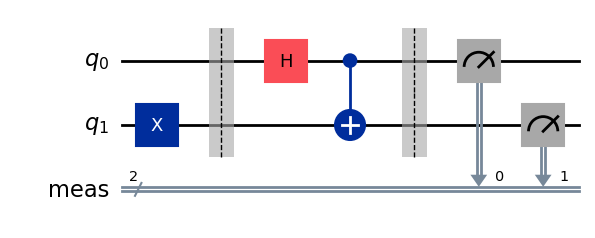

In [22]:
from qiskit import QuantumCircuit, transpile

# Create a Bell Circuit
bell = QuantumCircuit(2)
bell.x(1)
bell.barrier()
bell.h(0)
bell.cx(0,1)
bell.measure_all()

bell.draw('mpl')

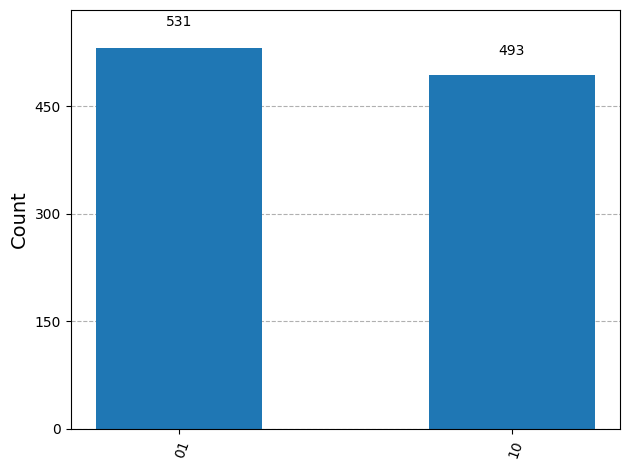

In [24]:
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
sampler = BackendSamplerV2(backend=simulator)

# Transpile to an ISA circuit for the intended backend
isa_bell = transpile(bell,simulator)

# Construct pub and run
pub_bell = (isa_bell)
job = sampler.run([pub_bell], shots=1024)

# Extract and plot results
result = job.result()
data = result[0].data
counts = data.meas.get_counts()

plot_histogram(counts)

The generation of the Bell state is confirmed, i.e., a fully entangled state, with a 50–50 probability of measuring the quantum register in either $|01\rangle$ or $|10\rangle$.

Finally, we execute the above circuit on the Quantum Computer Simulator (QCS) and obtain the expected results, summarized in the following figures:

<img src="01a.png" alt="Bell state evolution" width="600"/>

The diagram above shows the computational steps on the horizontal axis and the qubits on the vertical axis in decimal representation. The grayscale indicates the probability for each state at each step, ranging from 0 to 1. Initially, at step (1), we start from the state $|01\rangle$, corresponding to decimal $1$, with probability 1. Therefore, we see a single black box representing qubit "**1**" at step 1.  

At step (2), we apply a Hadamard gate on the top qubit, and the register state becomes, as previously calculated, $\frac{1}{\sqrt{2}}(|01\rangle + |11\rangle)$, i.e., a superposition of the basis states $|01\rangle$ and $|11\rangle$, each with probability **0.5**. Thus, we see two gray boxes—with color indicating probability **1/2**—at qubits "**1**" and "**3**", corresponding to $|01\rangle$ and $|11\rangle$.  

Finally, after applying the CNOT gate, we obtain the entangled Bell state, shown at step (3), with probability **0.5** for $|01\rangle$ (decimal "**1**") and **0.5** for $|10\rangle$ (decimal "**2**").

<img src="01b.png" alt="Bell state entanglement" width="600"/>

In the figure above, the horizontal axis again shows the computational steps, while the vertical axis now represents the measure of entanglement in ebits. During the first two steps, where no entanglement is present, there are obviously 0 ebits. At the final step, when the Bell state is created, we have **2 ebits**, corresponding to the two entangled qubits.  

<img src="01c.png" alt="Bell state phase angles" width="600"/>

Finally, in this diagram, we observe the phase angles at each computational step. The arrow pointing horizontally to the right corresponds to an angle of $0^\circ$. During the generation of the Bell state $|B_{01}\rangle$, the arrows remain horizontal to the right, as no relative phase is created.


##### $|B_{10}\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

Next, we generate the Bell state $|B_{10}\rangle$. We use the same Bell circuit as before, with the only difference being that the quantum register is now initialized in the basis state $|10\rangle$. For the calculation, we use the operators, equivalent to the matrices we saw previously, as follows:

$$
\begin{aligned}
CNOT(H \otimes I) |10\rangle
&= CNOT(H|1\rangle) |0\rangle \\
&= CNOT\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)|0\rangle \\
&= \frac{1}{\sqrt{2}}\left(CNOT|0\rangle|0\rangle - CNOT|1\rangle|0\rangle\right) \\
&= \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) = |B_{10}\rangle
\end{aligned}
$$

We run the calculation on the QCS and obtain the corresponding diagrams:

<img src="10a.png" alt="Bell state evolution" width="600"/>
<img src="10b.png" alt="Bell state entanglement" width="600"/>
<img src="10c.png" alt="Bell state phase angles" width="600"/>

In the first diagram, the step-by-step evolution of the register state is shown. At step 1, we start from $|10\rangle$, which corresponds to decimal $2$. At step 2, after applying the Hadamard gate, the register is in a superposition of the basis states $|10\rangle$ and $|11\rangle$, corresponding to decimal $2$ and $3$. Finally, after applying the CNOT gate at step 3, we obtain the entangled state $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$, with equal probabilities for $|0\rangle$ and $|3\rangle$.  

In the middle diagram, **2 ebits** of entanglement are generated at the final step.  

In the last diagram, at step 2, the arrow of qubit $|2\rangle$ has rotated $180^\circ$ and remains horizontal to the left at step 3, indicating a relative phase of $\pi$, i.e., a factor of *-1*, which is created by the action of the Hadamard gate on the basis state $|1\rangle$.

We now visualize the action of the **Hadamard** gate on the basis states using the Bloch sphere.  

-   We create a single-qubit quantum circuit and leave the qubit in its default state $|0\rangle$. Using `plot_bloch_multivector`, we can see the qubit represented as a vector pointing along the positive Z-axis on the Bloch sphere.

-  Applying the Hadamard gate to $|0\rangle$ transforms it into the superposition state  
   $$
   H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
   $$  
   On the Bloch sphere, this moves the vector to the equator along the X-axis, illustrating the equal superposition of $|0\rangle$ and $|1\rangle$.  


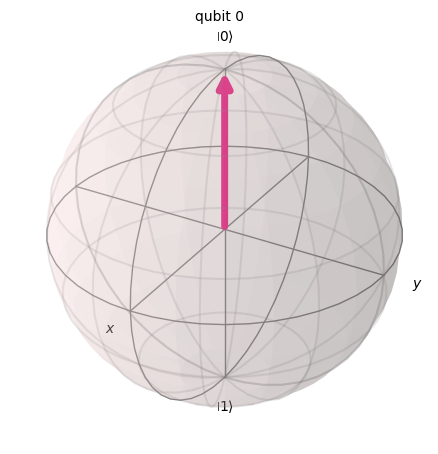

In [39]:
from qiskit.visualization import plot_bloch_multivector

q_0 = QuantumCircuit(1)
q_0.id(0)

plot_bloch_multivector(q_0)

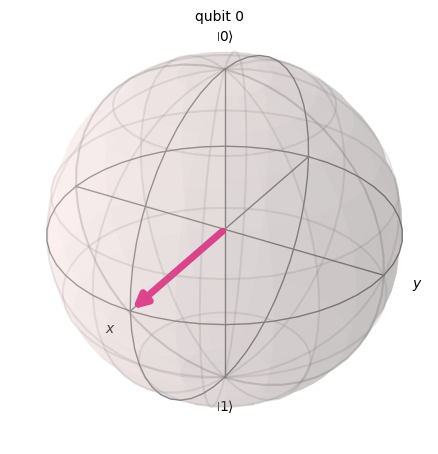

In [49]:
q_0.h(0)

plot_bloch_multivector(q_0)

Next, we visualize the action of the **Hadamard** gate on the basis state $|1\rangle$.

-  We create a single-qubit quantum circuit and apply the $X$ gate to flip the qubit from $|0\rangle$ to $|1\rangle$. On the Bloch sphere, this corresponds to the vector pointing along the negative Z-axis.

-  Applying the Hadamard gate transforms $|1\rangle$ into the superposition state  
   $$
   H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
   $$  
   On the Bloch sphere, this moves the vector to the equator along the negative X-axis, showing that the qubit is now in an equal superposition of $|0\rangle$ and $|1\rangle$ with a relative phase of $-1$.

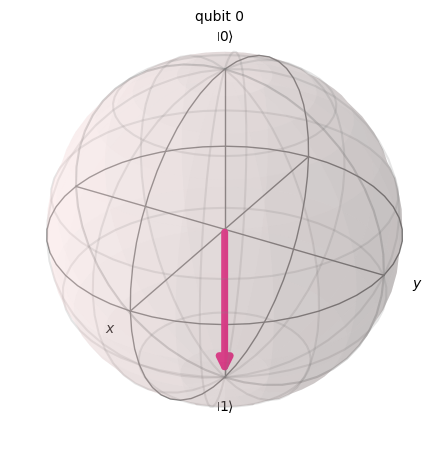

In [56]:
q_1 = QuantumCircuit(1)
q_1.x(0)

plot_bloch_multivector(q_1)

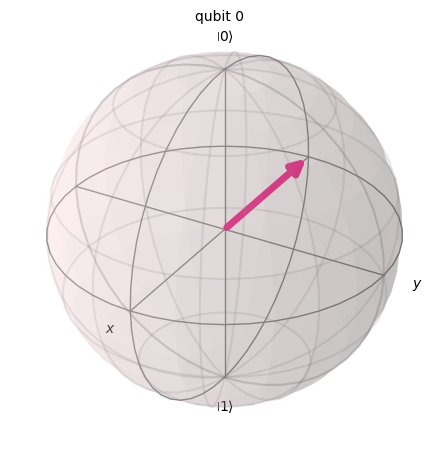

In [58]:
q_1.h(0)

plot_bloch_multivector(q_1)

#### Exercise 6.5

Use the QCS simulator to generate entanglement among 4 qubits, starting from the initial states $|1010\rangle$ and $|0100\rangle$.

We begin with the state $|\psi_0\rangle = |1010\rangle$, which corresponds to decimal 10.

We first apply a **Hadamard** gate to the top qubit:

$$
\begin{aligned}
|\psi_1 \rangle = (H \otimes I \otimes I \otimes I)|1010\rangle =  H|1\rangle \otimes |010\rangle
= \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)|010\rangle
= \frac{1}{\sqrt{2}}(|0010\rangle-|1010\rangle)
\end{aligned}
$$

Next, we apply successive **CNOT** gates to entangle neighboring qubits:

$$\begin{aligned}
|\psi_2 \rangle = (CNOT \otimes I \otimes I)|\psi_1\rangle
= \frac{1}{\sqrt{2}}(CNOT|00\rangle |10\rangle - CNOT|10\rangle |10\rangle)
= \frac{1}{\sqrt{2}}(|0010\rangle-|1110\rangle)
\end{aligned}$$

$$\begin{aligned}
|\psi_3 \rangle = (I \otimes CNOT \otimes I)|\psi_2\rangle
= \frac{1}{\sqrt{2}}(|0\rangle CNOT|01\rangle |0\rangle - |1\rangle CNOT|11\rangle |0\rangle)
= \frac{1}{\sqrt{2}}(|0010\rangle-|1100\rangle)
\end{aligned}$$

$$\begin{aligned}
|\psi_4 \rangle = (I \otimes  I \otimes CNOT)|\psi_3\rangle
= \frac{1}{\sqrt{2}}(|00\rangle CNOT|10\rangle - |11\rangle CNOT|00\rangle)
= \frac{1}{\sqrt{2}}(|0011\rangle-|1100\rangle)
\end{aligned}$$

Thus, the final entangled state of the 4 qubits is:

$$
|\psi_4 \rangle = \frac{1}{\sqrt{2}}(|0011\rangle - |1100\rangle)
$$

Before running the 4-qubit entanglement circuit, it is often helpful to understand how the 16 possible 4-qubit states map to decimal numbers. Each 4-bit binary string corresponds to a decimal integer from 0 to 15:

In [69]:
for i in range(16):
    print(f"{format(i, '04b')} -> {i}")

0000 -> 0
0001 -> 1
0010 -> 2
0011 -> 3
0100 -> 4
0101 -> 5
0110 -> 6
0111 -> 7
1000 -> 8
1001 -> 9
1010 -> 10
1011 -> 11
1100 -> 12
1101 -> 13
1110 -> 14
1111 -> 15


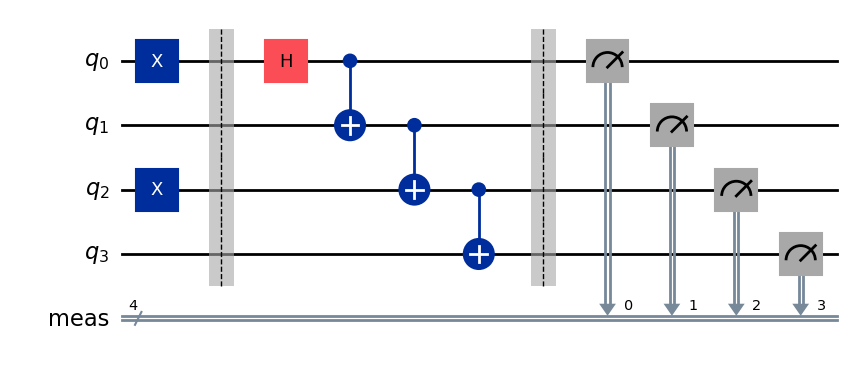

In [63]:
from qiskit import QuantumCircuit, transpile

qc = QuantumCircuit(4)
qc.x(0)
qc.x(2)
qc.barrier()
qc.h(0)
for i in range(1, 4):
        qc.cx(i-1, i)
qc.measure_all()

qc.draw('mpl')

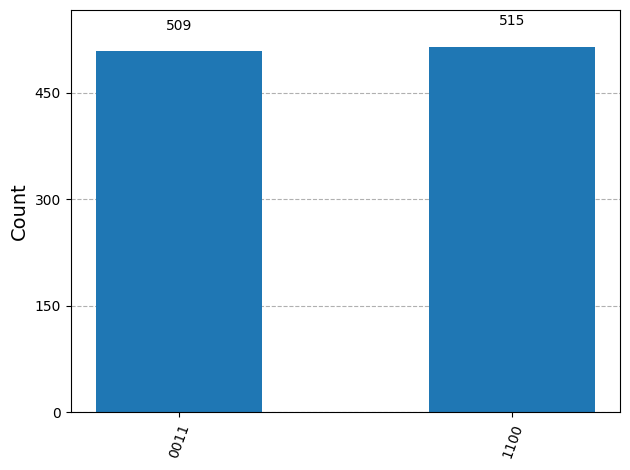

In [65]:
simulator = AerSimulator()
sampler = BackendSamplerV2(backend=simulator)

# Transpile to an ISA circuit for the intended backend
isa_qc = transpile(qc,simulator)

# Construct pub and run
pub_qc = (isa_qc)
job = sampler.run([pub_qc], shots=1024)

# Extract and plot results
result = job.result()
data = result[0].data
counts = data.meas.get_counts()

plot_histogram(counts)

We run the above circuit on the QCS and obtain the following diagrams:

<img src="1010a.png" alt="4-qubit state evolution" width="600"/>
<img src="1010b.png" alt="4-qubit entanglement" width="600"/>
<img src="1010c.png" alt="4-qubit phase angles" width="600"/>

In the first diagram, the state of the register is shown at each computational step. Initially, we have $|\psi_0 \rangle = |1010\rangle$, corresponding to decimal 10, with probability $P(1010) = 1.$ At step 2, the action of the Hadamard gate brings the register into a superposition of $|0010\rangle$ and $|1010\rangle$, corresponding to decimals 2 and 10, with equal probability $P(0010) = P(1010) = 0.5$. Next, a chain of Controlled-NOT gates acts on the system, ultimately producing the entangled superposition of $|0011\rangle$ and $|1100\rangle$, i.e., decimals 3 and 12, with probability $P(0011) = P(1100) = 0.5$.

In the second diagram, we see how the chain of CNOT gates generates entanglement. Initially, 2 qubits become entangled at step 3, giving **2 ebits**. Then, one of these two qubits becomes entangled with the next qubit below, adding another **ebit**, and finally, the system of 4 qubits is fully entangled, resulting in **4 ebits**.

The last diagram shows the effect of the Hadamard gate, which introduces a relative phase of $\pi$. Therefore, the arrow corresponding to the state $|1010\rangle$ (decimal 10) points to the left and remains in this direction for the subsequent steps (even as the state changes), since the chain of CNOT gates does not alter the relative phase of the quantum register.


##### $|\pi_0 \rangle = |0100\rangle$

Next, we start from the state $|\pi_0 \rangle = |0100\rangle$, which corresponds to decimal 4.

We first apply a **Hadamard** gate to the top qubit:

$$\begin{aligned}
|\pi_1 \rangle = (H \otimes I \otimes I \otimes I)|0100\rangle =  H|0\rangle \otimes |100\rangle
= \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)|100\rangle
= \frac{1}{\sqrt{2}}(|0100\rangle+|1100\rangle)
\end{aligned}$$

Next, we apply successive **CNOT** gates to entangle neighboring qubits:

$$\begin{aligned}
|\pi_2 \rangle = (CNOT \otimes I \otimes I)|\pi_1\rangle
= \frac{1}{\sqrt{2}}(CNOT|01\rangle |00\rangle + CNOT|11\rangle |00\rangle)
= \frac{1}{\sqrt{2}}(|0100\rangle+|1000\rangle)
\end{aligned}$$

$$\begin{aligned}
|\pi_3 \rangle = (I \otimes CNOT \otimes I)|\pi_2\rangle
= \frac{1}{\sqrt{2}}(|0\rangle CNOT|10\rangle |0\rangle + |1\rangle CNOT|00\rangle |0\rangle)
= \frac{1}{\sqrt{2}}(|0110\rangle+|1000\rangle)
\end{aligned}$$

$$\begin{aligned}
|\pi_4 \rangle = (I \otimes  I \otimes CNOT)|\pi_3\rangle
= \frac{1}{\sqrt{2}}(|01\rangle CNOT|10\rangle + |10\rangle CNOT|00\rangle)
= \frac{1}{\sqrt{2}}(|0111\rangle+|1000\rangle)
\end{aligned}$$

Thus, the final entangled state of the 4 qubits is:

$$
|\pi_4 \rangle = \frac{1}{\sqrt{2}}(|0111\rangle + |1000\rangle)
$$

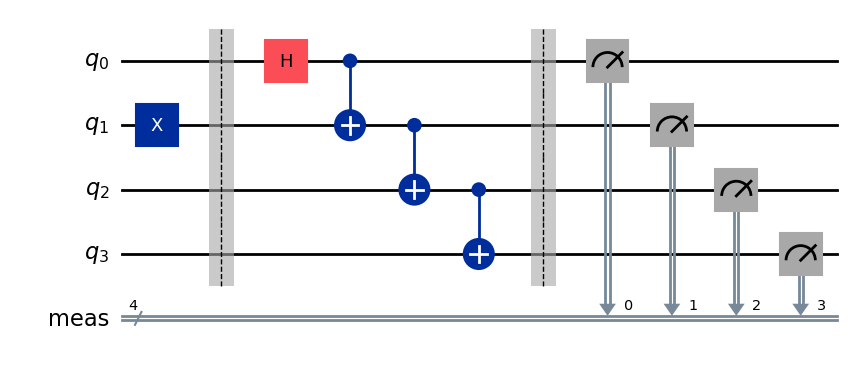

In [78]:
from qiskit import QuantumCircuit, transpile

circuit = QuantumCircuit(4)
circuit.x(1)
circuit.barrier()
circuit.h(0)
for i in range(1, 4):
        circuit.cx(i-1, i)
circuit.measure_all()

circuit.draw('mpl')

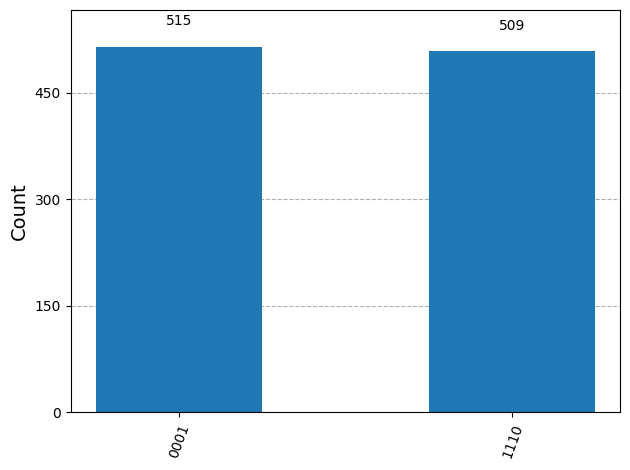

In [86]:
simulator = AerSimulator()
sampler = BackendSamplerV2(backend=simulator)

# Transpile to an ISA circuit for the intended backend
isa_circuit = transpile(circuit,simulator)

# Construct pub and run
pub_circuit= (isa_circuit)
job = sampler.run([pub_circuit], shots=1024)

# Extract and plot results
result = job.result()
data = result[0].data
counts = data.meas.get_counts()

plot_histogram(counts)

We run the above circuit on the σιμθλατορ and obtain the following diagrams:

<img src="0100a.png" alt="4-qubit state evolution" width="600"/>
<img src="0100b.png" alt="4-qubit entanglement" width="600"/>
<img src="0100c.png" alt="4-qubit phase angles" width="600"/>

Thus, the diagrams produced by the simulator once again confirm the results of the calculations shown above!

#### 4.1 Deutsch's Quantum Algorithm

The problem posed by Deutsch is as follows: we are given a function $f(x)$ such that:

$$
f(x): \{0,1\} \to \{0,1\}
$$

That is, the variable $x$ and the function $f(x)$ can take only the values 0 or 1. For such a function, there are two possible cases:

1. $f(0) = f(1)$, in which case the function is called **constant**.  
2. $f(0) \ne f(1)$, in which case the function is called **balanced**.

According to example 4.1, the action of a *CNOT* gate on the first (bottom) qubit is:

$$
CNOT \, \ket{x}\ket{a} \rightarrow \ket{x}\ket{a \oplus x}
$$  

We start from the state $|q_0 \rangle = |01\rangle$, corresponding to decimal 1.

We apply Hadamard gates to both qubits:

$$\begin{aligned}
|q_1 \rangle = (H \otimes H)|01\rangle =  H|0\rangle \otimes H|1\rangle
= \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)
= \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)
\end{aligned}$$

Next, the CNOT acts with control on the top qubit and target on the bottom qubit:

$$\begin{aligned}
|q_2 \rangle = CNOT |q_1 \rangle =
\frac{1}{2}(CNOT|00\rangle - CNOT|01\rangle + CNOT|10\rangle - CNOT|11\rangle)
= \frac{1}{2}(|00\rangle - |01\rangle + |11\rangle - |10\rangle)
= \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle )
\end{aligned}$$

Finally, we apply a Hadamard gate to the top qubit:

$$\begin{aligned}
|q_3\rangle &= (H \otimes I) |q_2\rangle \\
&= (H \otimes I) \cdot \frac{1}{2} \left( |00\rangle - |01\rangle - |10\rangle + |11\rangle \right) \\
&= \frac{1}{2} \left[
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle
- \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|1\rangle \right.\left. - \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)|0\rangle
+ \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)|1\rangle
\right] \\
&= \frac{1}{2\sqrt{2}} \left(
|00\rangle + |10\rangle - |01\rangle - |11\rangle
- |00\rangle + |10\rangle + |01\rangle - |11\rangle
\right) \\
&= \frac{1}{2\sqrt{2}} \left(
2 \cdot |10\rangle - 2 \cdot|11\rangle
\right) = \frac{1}{\sqrt{2}} \left( |10\rangle - |11\rangle \right) \\
&= |1\rangle(\frac{|0\rangle - |1\rangle }{\sqrt{2}})
\end{aligned}$$

This shows that the top qubit ends in the state $|1\rangle$, indicating a **balanced function**, while the bottom qubit is in a superposition $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$.

We then construct a quantum circuit that reproduces **Deutsch's algorithm**, for the case where the *Oracle* coincides with the *CNOT* gate, using **Qiskit**.

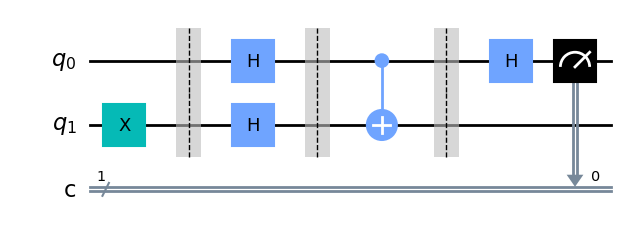

In [95]:
# Step 1: Map the problem
qc_deutsch = QuantumCircuit(2,1)

qc_deutsch.x(1)

qc_deutsch.barrier()
qc_deutsch.h(range(2))

qc_deutsch.barrier()
qc_deutsch.cx(0,1)
qc_deutsch.barrier()

qc_deutsch.h(0)
qc_deutsch.measure(0,0)

qc_deutsch.draw('mpl', style="clifford")

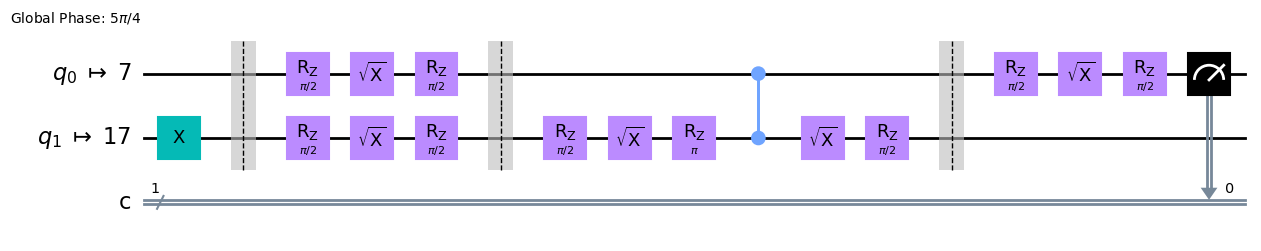

In [97]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_deutsch)

qc_isa.draw('mpl', style="clifford")

In [101]:
# Step 3: Run the job
job = sampler.run([qc_isa],shots=1) 
res=job.result()
counts=res[0].data.c.get_counts()

In [103]:
# Step 4: Visualize and analyze results
print(counts)
if '1' in counts:
    print("Balanced")
else:
    print("Constant")

{'1': 1}
Balanced


Next, we simulate the circuit on the **QCS** and obtain the corresponding diagrams:

<img src="deutsch.png" alt="Deutsch algorithm state evolution" width="600"/>
<img src="deutsch2.png" alt="Deutsch algorithm phases and amplitudes" width="600"/>

We start from the state $|01\rangle$, corresponding to decimal 1, with probability 1 and relative phase 1 (i.e., an arrow pointing horizontally to the right, angle $0^\circ$).  

In the second step, we apply the *Hadamard* gates, which bring the quantum register into the superposition:

$$
\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)
$$

That is, a superposition of all four computational basis states with equal probability $P=0.25$.  
We observe that the arrows corresponding to $|01\rangle$ and $|11\rangle$ (decimal 1 and 4) have rotated by $180^\circ$ to the left, since their relative phase is now $-1$ (angle $\pi$).  

Next, we apply the *CNOT* gate in step 3, which does not affect the amplitudes but modifies the relative phases. As a result, $|11\rangle$ now has a phase angle $0^\circ$, while $|10\rangle$ has a phase angle $\pi$.  

Finally, in step 4, the action of the *Hadamard* gate produces the state:

$$
\frac{1}{\sqrt{2}}(|10\rangle - |11\rangle)
$$

This is a superposition of the basis states $|10\rangle$ and $|11\rangle$ (decimal 2 and 3), with equal amplitudes $P(10) = P(11) = 0.5$, and relative phases 1 for $|10\rangle$ and $-1$ for $|11\rangle$.


#### 7.4 Shor's Quantum Algorithm

*"The factoring problem reduces to finding the period"*

In example *7.4*, we search for the period of the trigonometric function:

$$
f(x) = \cos(\pi x) + 1, \quad x = 0,1,2,\dots,q-1
$$

We first choose an integer $q$ such that $f(x)$ completes at least two periods, so we take $q = 8$.  
Next, we define two quantum registers: $Reg_1$ to store the values of $x$, which requires 3 qubits ($2^3=8$), and $Reg_2$ to store the values of the function, which only takes the values 0 and 2, so 2 qubits suffice.  
We initialize the register in the state:

$$
|Reg\rangle = |Reg_1\rangle |Reg_2\rangle = |000\rangle |00\rangle
$$

Using decimal notation from now on, we have:

$$
|\psi_0\rangle = |Reg_1\rangle |Reg_2\rangle = |0\rangle_3 |0\rangle_2 = |00\rangle_5
$$

We first create a superposition of all $x$ by applying *Hadamard* gates to $Reg_1$:

$$
|\psi_1\rangle = (H^{\otimes 3} \otimes I^{\otimes 2}) |\psi_0\rangle = \frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x\rangle_3 |0\rangle_2
$$

We define $f(x) = 2$ when $x$ is **even** and $f(x) = 0$ when $x$ is **odd**:

$$
f(x) = \cos(\pi x) + 1 =
\begin{cases}
2 & \text{if } x \text{ is even, } x \in \{0,2,4,6\} \\
0 & \text{if } x \text{ is odd, } x \in \{1,3,5,7\}
\end{cases}
$$

Next, we apply the *Oracle*:

$$
|x\rangle|0\rangle \mapsto |x\rangle|f(x)\rangle
$$

For $x \in \{0,1,\dots,7\}$, we can encode even $x$ as follows: if the last digit in the bitstring of $Reg_1$ is 0, then $x$ is even (e.g., decimal 4 corresponds to binary 100, last digit 0). In this case, we want $Reg_2$ to be $|10\rangle$ (decimal 2), otherwise $|00\rangle$ (decimal 0).

After the Oracle, the register state becomes:

$$
|\psi_2\rangle = \frac{1}{\sqrt{8}} (|0\rangle|2\rangle + |1\rangle|0\rangle + |2\rangle|2\rangle + \dots + |7\rangle|0\rangle)
$$

If we measure the second register and obtain $|2\rangle$, the wavefunction collapses to the $x$ values where $f(x)=2$:

$$
|\psi_3\rangle = \frac{1}{2}(|0\rangle + |2\rangle + |4\rangle + |6\rangle)|2\rangle
$$

Next, we apply the Quantum Fourier Transform (QFT) to the first register, which acts as:

$$
\text{QFT} \,|x\rangle = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi i \frac{x k}{N}} |k\rangle
$$

and we obtain:

$$
|\psi_4\rangle = QFT|\psi_3\rangle = \frac{1}{2} \sum_{x \in A} \frac{1}{\sqrt{8}} \sum_{k=0}^{7} e^{2\pi i \frac{x k}{8}} |k\rangle |2\rangle
$$

Finally, after the Fourier transform produces constructive and destructive interference, the register state becomes:

$$
|\psi\rangle = \frac{4}{\sqrt{32}}|0\rangle|2\rangle + \frac{1}{\sqrt{32}}(1 + e^{2\pi i} + e^{4\pi i} + e^{6\pi i}) |4\rangle |2\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |4\rangle)|2\rangle
$$

Thus, the final measurement of $Reg_1$ is expected to yield $|000\rangle$ and $|100\rangle$, corresponding to decimal 0 and 4, with probabilities $P(000)=P(100)=0.5$. From this, we conclude that the period of $f(x)$ is $r=2$.

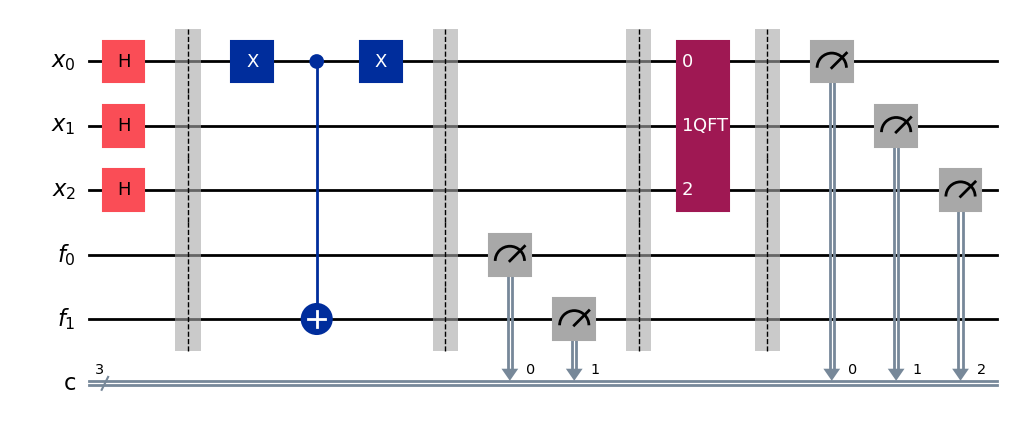

In [110]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.circuit.library import QFT

reg1 = QuantumRegister(3, name='x')      
reg2 = QuantumRegister(2, name='f')      
creg = ClassicalRegister(3, name='c')    

shor = QuantumCircuit(reg1, reg2, creg)

shor.h(reg1)
shor.barrier()

# Oracle
shor.x(reg1[0])             
shor.cx(reg1[0], reg2[1]) 
shor.x(reg1[0])              
shor.barrier()

shor.measure(reg2, [0,1])
shor.barrier()

qft = QFT(3, do_swaps=True).to_gate()
qft.name = "QFT"
shor.append(qft, [0, 1, 2])
shor.barrier()

shor.measure(reg1, creg)

shor.draw('mpl')

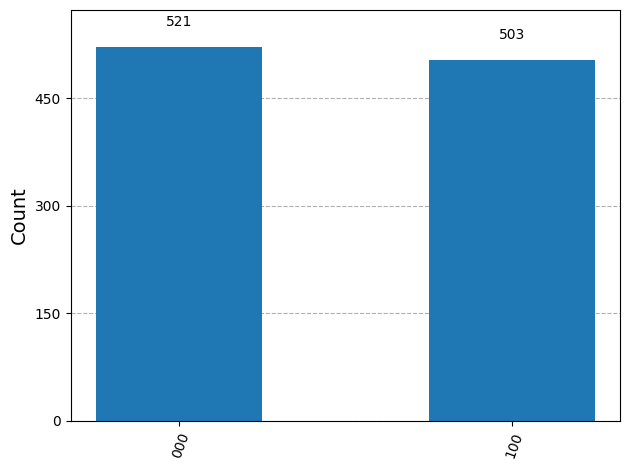

In [114]:
simulator = AerSimulator()
sampler = BackendSamplerV2(backend=simulator)

isa_shor = transpile(shor,simulator)

pub_shor = (isa_shor)
job = sampler.run([isa_shor],shots=1024) 
res=job.result()
counts=res[0].data.c.get_counts()

plot_histogram(counts)

For reproducing the circuit on the **QCS**, we proceed as follows:

* We start from the state that results after measuring the second register, which is in the state $|2\rangle$:

$$
|\psi_3\rangle = \frac{1}{2}(|0\rangle + |2\rangle + |4\rangle + |6\rangle)|2\rangle
$$

This effectively filters the circuit, since the wavefunction of *Reg1* collapses to the even values of $x$.

* Therefore, we will simulate only the first register, as the second register after measurement remains in the state $|10\rangle$. We initialize the circuit on the simulator with 3 qubits in the state:

$$
|\phi_0\rangle = |000\rangle
$$

* We apply *Hadamard* gates to the two upper qubits, as follows:

$$\begin{aligned}
|\phi_1\rangle &= (H \otimes H \otimes I)\,|000\rangle \\
&= H \,|0\rangle \otimes H \,|0\rangle \otimes I \,|0\rangle \\
&= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle \\
&= \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)|0\rangle \\
&= \frac{1}{2}(|000\rangle + |010\rangle + |100\rangle + |110\rangle) \\
&= \frac{1}{2}(|0\rangle + |2\rangle + |4\rangle + |6\rangle)
\end{aligned}$$

* Next, we execute the quantum *Fourier Transform* using *Hadamard* and *Controlled-Phase* gates as shown below.


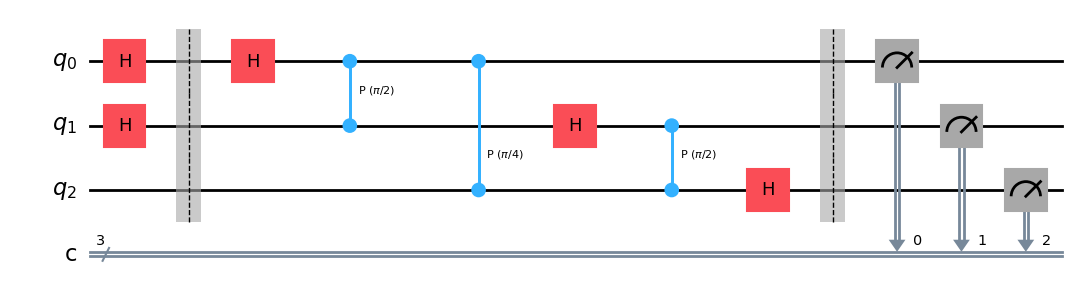

In [123]:
import numpy as np

qft = QuantumCircuit(3, 3)

# Initialize
qft.h(0)
qft.h(1)
qft.barrier()

# QFT
qft.h(0)
qft.cp(np.pi/2, 1, 0)
qft.cp(np.pi/4, 2, 0)

qft.h(1)
qft.cp(np.pi/2, 2, 1)

qft.h(2)
qft.barrier()

# Measure
qft.measure([0,1,2], [0,1,2])

qft.draw('mpl')

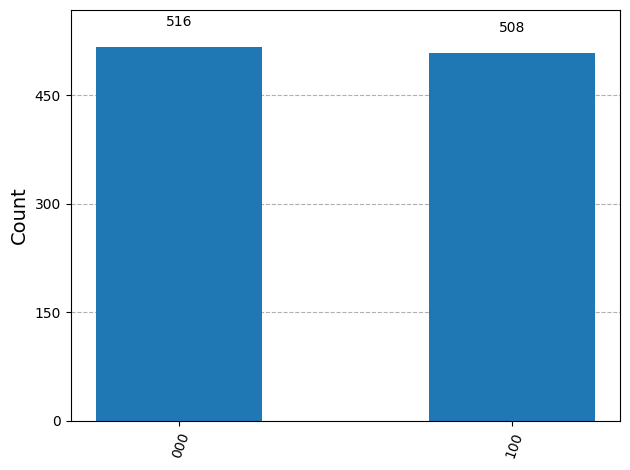

In [125]:
simulator = AerSimulator()
sampler = BackendSamplerV2(backend=simulator)

isa_qft = transpile(qft,simulator)

pub_qft = (isa_qft)
job = sampler.run([isa_qft],shots=1024) 
res=job.result()
counts=res[0].data.c.get_counts()

plot_histogram(counts)

We end up with the final measurement of the quantum register yielding $|000\rangle$ and $|100\rangle$, corresponding to decimal 0 and 4, with probabilities $P(000)=P(100)=0.5$. Thus, we verified that the period of $f(x)$ is $r=2$.

### Summary of This Notebook

This notebook presented a series of exercises and simulations in quantum computing, using both **Qiskit** and **QCS 2.0**, covering fundamental and intermediate concepts:

* **Quantum states and gates:** Introduction to qubits, tensor products, Hadamard and CNOT gates, and Bloch sphere visualization.
* **Bell states and entanglement:** Generation and verification of 2-qubit and 4-qubit entangled states.
* **Deutsch’s algorithm:** Step-by-step implementation, simulation, and measurement analysis for constant vs balanced functions.
* **Shor’s algorithm (toy example):** Period finding using quantum Fourier transform, measurement post-selection, and verification of periodicity.

Throughout, the simulations illustrated how quantum circuits evolve, how superposition and entanglement manifest, and how quantum algorithms exploit these properties for computational advantage.

---

### Bibliography

1. M. A. Nielsen, I. L. Chuang, *Quantum Computation and Quantum Information*, Cambridge University Press, 2010.  
2. I. G. Karafyllidis, *Quantum Computing*, Kallipos, Open Academic Editions, 2015